In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sn

# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, make_scorer, balanced_accuracy_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from datetime import datetime

In [2]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\Thesis\\data huawei\\propressed_data\\sampled_data2.csv", sep = ',')
df1 = df.drop(['uid', 'communication_onlinerate', 'up_membership_grade'], axis = 1, inplace = False)

X = df1.drop(['label'], axis = 1).copy()
y = df1['label'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.25)

In [3]:
# df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\Thesis\\data huawei\\propressed_data\\sampled_data2.csv", sep = ',')
df2 = df.drop(['uid', 'communication_onlinerate', 'membership_life_duration'], axis = 1, inplace = False)

X = df2.drop(['label'], axis = 1).copy()
y = df2['label'].copy()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.25)

In [3]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [73]:
# final
model_lightgbm = lgb.LGBMClassifier(seed = 42, objective = 'binary', learning_rate = 0.11, num_leaves = 100, max_depth = 7, subsample = 0.5, colsample_bytree = 0.8, n_estimators = 300, reg_alpha = 0.3, lamda = 0.1, min_child_samples = 20, min_child_weight = 0.001)
start_time = timer(None)
model_lightgbm.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test, y_test)])
timer(start_time)

[1]	valid_0's auc: 0.672363	valid_0's binary_logloss: 0.683106
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.679617	valid_0's binary_logloss: 0.674957
[3]	valid_0's auc: 0.680711	valid_0's binary_logloss: 0.66849
[4]	valid_0's auc: 0.684228	valid_0's binary_logloss: 0.663044
[5]	valid_0's auc: 0.686489	valid_0's binary_logloss: 0.658691
[6]	valid_0's auc: 0.68726	valid_0's binary_logloss: 0.654659
[7]	valid_0's auc: 0.69015	valid_0's binary_logloss: 0.651806
[8]	valid_0's auc: 0.69141	valid_0's binary_logloss: 0.648672
[9]	valid_0's auc: 0.693968	valid_0's binary_logloss: 0.645882
[10]	valid_0's auc: 0.695	valid_0's binary_logloss: 0.643555
[11]	valid_0's auc: 0.695612	valid_0's binary_logloss: 0.641627
[12]	valid_0's auc: 0.696625	valid_0's binary_logloss: 0.639765
[13]	valid_0's auc: 0.697084	valid_0's binary_logloss: 0.638239
[14]	valid_0's auc: 0.697732	valid_0's binary_logloss: 0.636959
[15]	valid_0's auc: 0.697851	valid_0's binary_logloss: 0.63

[131]	valid_0's auc: 0.722217	valid_0's binary_logloss: 0.612894
[132]	valid_0's auc: 0.722264	valid_0's binary_logloss: 0.612849
[133]	valid_0's auc: 0.722348	valid_0's binary_logloss: 0.612787
[134]	valid_0's auc: 0.722477	valid_0's binary_logloss: 0.612681
[135]	valid_0's auc: 0.722545	valid_0's binary_logloss: 0.612622
[136]	valid_0's auc: 0.72256	valid_0's binary_logloss: 0.612611
[137]	valid_0's auc: 0.722654	valid_0's binary_logloss: 0.61253
[138]	valid_0's auc: 0.722656	valid_0's binary_logloss: 0.612524
[139]	valid_0's auc: 0.722658	valid_0's binary_logloss: 0.612525
[140]	valid_0's auc: 0.722677	valid_0's binary_logloss: 0.612503
[141]	valid_0's auc: 0.722696	valid_0's binary_logloss: 0.612486
[142]	valid_0's auc: 0.722719	valid_0's binary_logloss: 0.612471
[143]	valid_0's auc: 0.722716	valid_0's binary_logloss: 0.612468
[144]	valid_0's auc: 0.722765	valid_0's binary_logloss: 0.612431
[145]	valid_0's auc: 0.722726	valid_0's binary_logloss: 0.612452
[146]	valid_0's auc: 0.7227

[258]	valid_0's auc: 0.724496	valid_0's binary_logloss: 0.611091
[259]	valid_0's auc: 0.724505	valid_0's binary_logloss: 0.611085
[260]	valid_0's auc: 0.724502	valid_0's binary_logloss: 0.611082
[261]	valid_0's auc: 0.724504	valid_0's binary_logloss: 0.611082
[262]	valid_0's auc: 0.724499	valid_0's binary_logloss: 0.611083
[263]	valid_0's auc: 0.724483	valid_0's binary_logloss: 0.611095
[264]	valid_0's auc: 0.724494	valid_0's binary_logloss: 0.611091
[265]	valid_0's auc: 0.724482	valid_0's binary_logloss: 0.6111
[266]	valid_0's auc: 0.724497	valid_0's binary_logloss: 0.61109
[267]	valid_0's auc: 0.724526	valid_0's binary_logloss: 0.611059
[268]	valid_0's auc: 0.724529	valid_0's binary_logloss: 0.611056
[269]	valid_0's auc: 0.724516	valid_0's binary_logloss: 0.611067
[270]	valid_0's auc: 0.724525	valid_0's binary_logloss: 0.611055
[271]	valid_0's auc: 0.724525	valid_0's binary_logloss: 0.611056
[272]	valid_0's auc: 0.724514	valid_0's binary_logloss: 0.611067
[273]	valid_0's auc: 0.72450

In [74]:
model_xgb = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic',n_estimators = 250, learning_rate = 0.15)
start_time = timer(None)
model_xgb.fit(X_train2, y_train2, verbose = True, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test2, y_test2)])
timer(start_time)

[0]	validation_0-auc:0.66712
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.67062
[2]	validation_0-auc:0.67892
[3]	validation_0-auc:0.68114
[4]	validation_0-auc:0.68354
[5]	validation_0-auc:0.68625
[6]	validation_0-auc:0.68720
[7]	validation_0-auc:0.68767
[8]	validation_0-auc:0.68932
[9]	validation_0-auc:0.69181
[10]	validation_0-auc:0.69326
[11]	validation_0-auc:0.69425
[12]	validation_0-auc:0.69534
[13]	validation_0-auc:0.69624
[14]	validation_0-auc:0.69685
[15]	validation_0-auc:0.69737
[16]	validation_0-auc:0.69818
[17]	validation_0-auc:0.69912
[18]	validation_0-auc:0.69948
[19]	validation_0-auc:0.69996
[20]	validation_0-auc:0.70056
[21]	validation_0-auc:0.70117
[22]	validation_0-auc:0.70184
[23]	validation_0-auc:0.70213
[24]	validation_0-auc:0.70255
[25]	validation_0-auc:0.70327
[26]	validation_0-auc:0.70348
[27]	validation_0-auc:0.70409
[28]	validation_0-auc:0.70433
[29]	validation_0-auc:0.70464
[30]	validation_0-auc:0.70476
[31]	validation_

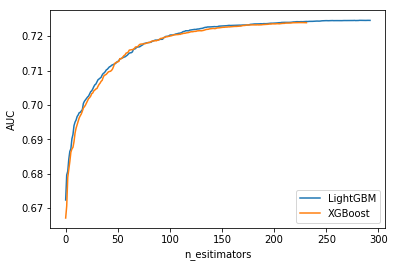

In [12]:
auc = pd.DataFrame(list(model_lightgbm.evals_result_.values())[0]['auc']).reset_index()
auc2 = pd.DataFrame(list(model_xgb.evals_result_.values())[0]['auc']).reset_index()

plt.plot(auc.iloc[:, 0], auc.iloc[:, 1], label = 'LightGBM')
plt.plot(auc2.iloc[:, 0], auc2.iloc[:, 1], label = 'XGBoost')

plt.legend()
plt.xlabel('n_esitimators')
plt.ylabel('AUC')
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\auc.png", dpi = 200, bbox_inches = 'tight')
plt.show();
#auc.iloc[:, 1]

In [4]:
model_lightgbm2 = lgb.LGBMClassifier(seed = 42, objective = 'binary', learning_rate = 0.1, num_leaves = 100, max_depth = 7, n_estimators = 350, reg_alpha = 10, reg_lamda = 0.1)
start_time = timer(None)
model_lightgbm2.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])
timer(start_time)

[LightGBM] [Warning] Unknown parameter: reg_lamda
[1]	valid_0's binary_logloss: 0.683984
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.676538
[3]	valid_0's binary_logloss: 0.670367
[4]	valid_0's binary_logloss: 0.665254
[5]	valid_0's binary_logloss: 0.660696
[6]	valid_0's binary_logloss: 0.656773
[7]	valid_0's binary_logloss: 0.653268
[8]	valid_0's binary_logloss: 0.650292
[9]	valid_0's binary_logloss: 0.647911
[10]	valid_0's binary_logloss: 0.645689
[11]	valid_0's binary_logloss: 0.643612
[12]	valid_0's binary_logloss: 0.641996
[13]	valid_0's binary_logloss: 0.640345
[14]	valid_0's binary_logloss: 0.639108
[15]	valid_0's binary_logloss: 0.637503
[16]	valid_0's binary_logloss: 0.636471
[17]	valid_0's binary_logloss: 0.63524
[18]	valid_0's binary_logloss: 0.634375
[19]	valid_0's binary_logloss: 0.633657
[20]	valid_0's binary_logloss: 0.632887
[21]	valid_0's binary_logloss: 0.632189
[22]	valid_0's binary_logloss: 0.63148
[23]	valid_0's binar

[204]	valid_0's binary_logloss: 0.611423
[205]	valid_0's binary_logloss: 0.611416
[206]	valid_0's binary_logloss: 0.611364
[207]	valid_0's binary_logloss: 0.611357
[208]	valid_0's binary_logloss: 0.611354
[209]	valid_0's binary_logloss: 0.611307
[210]	valid_0's binary_logloss: 0.611287
[211]	valid_0's binary_logloss: 0.611241
[212]	valid_0's binary_logloss: 0.611228
[213]	valid_0's binary_logloss: 0.611227
[214]	valid_0's binary_logloss: 0.611235
[215]	valid_0's binary_logloss: 0.611217
[216]	valid_0's binary_logloss: 0.611221
[217]	valid_0's binary_logloss: 0.611204
[218]	valid_0's binary_logloss: 0.611199
[219]	valid_0's binary_logloss: 0.611126
[220]	valid_0's binary_logloss: 0.611088
[221]	valid_0's binary_logloss: 0.611088
[222]	valid_0's binary_logloss: 0.611094
[223]	valid_0's binary_logloss: 0.611086
[224]	valid_0's binary_logloss: 0.611087
[225]	valid_0's binary_logloss: 0.611038
[226]	valid_0's binary_logloss: 0.611046
[227]	valid_0's binary_logloss: 0.611021
[228]	valid_0's 

In [76]:
model_xgb2 = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic',n_estimators = 250, learning_rate = 0.15, max_depth = 7, num_leaves = 100, subsample = 1, colsample_bytree = 0.5, reg_alpha = 10, reg_lamda = 0.1)
start_time = timer(None)
model_xgb2.fit(X_train2, y_train2, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test2, y_test2)])
timer(start_time)

[0]	validation_0-logloss:0.68363
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.67319
[2]	validation_0-logloss:0.66439
[3]	validation_0-logloss:0.66027
[4]	validation_0-logloss:0.65649
[5]	validation_0-logloss:0.65144
[6]	validation_0-logloss:0.64695
[7]	validation_0-logloss:0.64377
[8]	validation_0-logloss:0.64127
[9]	validation_0-logloss:0.63974
[10]	validation_0-logloss:0.63865
[11]	validation_0-logloss:0.63709
[12]	validation_0-logloss:0.63583
[13]	validation_0-logloss:0.63377
[14]	validation_0-logloss:0.63228
[15]	validation_0-logloss:0.63117
[16]	validation_0-logloss:0.63065
[17]	validation_0-logloss:0.62966
[18]	validation_0-logloss:0.62915
[19]	validation_0-logloss:0.62854
[20]	validation_0-logloss:0.62775
[21]	validation_0-logloss:0.62714
[22]	validation_0-logloss:0.62661
[23]	validation_0-logloss:0.62568
[24]	validation_0-logloss:0.62536
[25]	validation_0-logloss:0.62494
[26]	validation_0-logloss:0.62451
[27]	validation_0-loglos

Stopping. Best iteration:
[225]	validation_0-logloss:0.61043


 Time taken: 0 hours 1 minutes and 38.38 seconds.


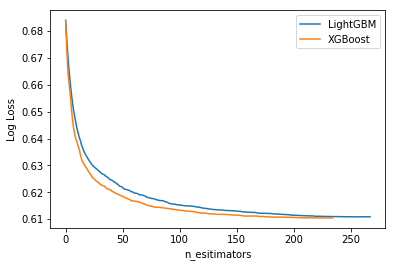

In [18]:
logloss = pd.DataFrame(list(model_lightgbm2.evals_result_.values())[0]['binary_logloss']).reset_index()
logloss2 = pd.DataFrame(list(model_xgb2.evals_result_.values())[0]['logloss']).reset_index()

plt.plot(logloss.iloc[:, 0], logloss.iloc[:, 1], label = 'LightGBM')
plt.plot(logloss2.iloc[:, 0], logloss2.iloc[:, 1], label = 'XGBoost')

plt.legend()
plt.xlabel('n_esitimators')
plt.ylabel('Log Loss')
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\logloss.png", dpi = 200, bbox_inches = 'tight')
plt.show();

In [47]:
x = ['XGBoost(AUC)', 'XGBoost(Log Loss)', 'LightGBM(AUC)', 'LightGBM(Log Loss)']
y = [19801.5, 17228.2, 7630.1, 5589.7]
z = [76.2, 57.4, 8.9, 16.2]

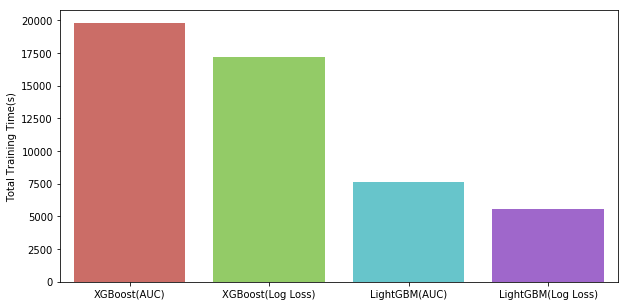

In [71]:
# import seaborn as sns
sns.barplot(x, y, palette = 'hls')
plt.rcParams["figure.figsize"] = (10, 5)
plt.ylabel('Total Training Time(s)')
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\total_training_time.png", dpi = 200, bbox_inches = 'tight')
plt.show();

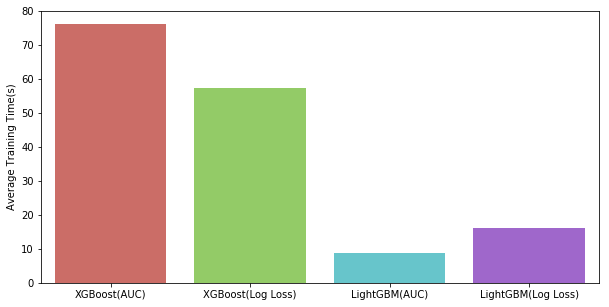

In [72]:
sns.barplot(x, z, palette = 'hls')
plt.rcParams["figure.figsize"] = (10, 5)
plt.ylabel('Average Training Time(s)')
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\average_training_time.png", dpi = 200, bbox_inches = 'tight')
plt.show();

In [77]:
from sklearn.metrics import f1_score

In [ ]:
y_pred = model_lightgbm.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

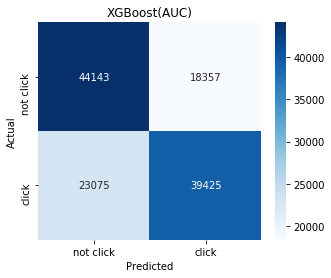

In [80]:
# confusion matrix
# xgboost auc
y_pred2 = model_xgb.predict(X_test2)
array = confusion_matrix(y_test2, y_pred2)
df_con = pd.DataFrame(array, index = ['not click', 'click'], columns = ['not click', 'click'])
plt.figure(figsize = (5, 4))
sn.heatmap(df_con, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost(AUC)')
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\confusion_xgboost_auc.png", dpi = 200, bbox_inches = 'tight')
plt.show()

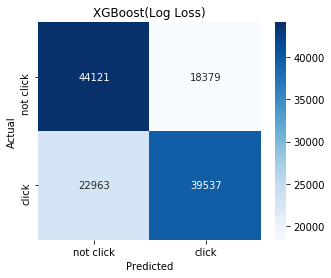

In [81]:
# confusion matrix
# xgboost logloss
y_pred2 = model_xgb2.predict(X_test2)
array = confusion_matrix(y_test2, y_pred2)
df_con = pd.DataFrame(array, index = ['not click', 'click'], columns = ['not click', 'click'])
plt.figure(figsize = (5, 4))
sn.heatmap(df_con, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost(Log Loss)')
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\confusion_xgboost_logloss.png", dpi = 200, bbox_inches = 'tight')
plt.show()

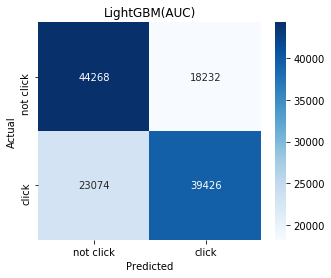

In [82]:
# confusion matrix
# lightgbm auc
y_pred = model_lightgbm.predict(X_test)
array = confusion_matrix(y_test, y_pred)
df_con = pd.DataFrame(array, index = ['not click', 'click'], columns = ['not click', 'click'])
plt.figure(figsize = (5, 4))
sn.heatmap(df_con, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM(AUC)')
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\confusion_lightgbm_auc.png", dpi = 200, bbox_inches = 'tight')
plt.show()

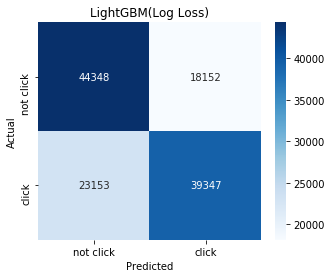

In [83]:
# lightgbm logloss
y_pred = model_lightgbm2.predict(X_test)
array = confusion_matrix(y_test, y_pred)
df_con = pd.DataFrame(array, index = ['not click', 'click'], columns = ['not click', 'click'])
plt.figure(figsize = (5, 4))
sn.heatmap(df_con, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM(Log Loss)')
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\confusion_lightgbm_logloss.png", dpi = 200, bbox_inches = 'tight')
plt.show()

In [84]:
# xgboost auc
y_pred2 = model_xgb.predict(X_test2)
print(classification_report(y_test2, y_pred2))
print(accuracy_score(y_test2, y_pred2))
print(precision_score(y_test2, y_pred2))
print(recall_score(y_test2, y_pred2))
print(f1_score(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68     62500
           1       0.68      0.63      0.66     62500

    accuracy                           0.67    125000
   macro avg       0.67      0.67      0.67    125000
weighted avg       0.67      0.67      0.67    125000

0.668544
0.6823059084143851
0.6308
0.6555428077351557


In [85]:
# xgboost logloss
y_pred2 = model_xgb2.predict(X_test2)
print(classification_report(y_test2, y_pred2))
print(accuracy_score(y_test2, y_pred2))
print(precision_score(y_test2, y_pred2))
print(recall_score(y_test2, y_pred2))
print(f1_score(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68     62500
           1       0.68      0.63      0.66     62500

    accuracy                           0.67    125000
   macro avg       0.67      0.67      0.67    125000
weighted avg       0.67      0.67      0.67    125000

0.669264
0.6826610953795151
0.632592
0.6566735317565773


In [86]:
# lightgbm auc
y_pred = model_lightgbm.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68     62500
           1       0.68      0.63      0.66     62500

    accuracy                           0.67    125000
   macro avg       0.67      0.67      0.67    125000
weighted avg       0.67      0.67      0.67    125000

0.669552
0.6837906274931492
0.630816
0.656235955991278


In [87]:
# lightgbm logloss
y_pred = model_lightgbm2.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68     62500
           1       0.68      0.63      0.66     62500

    accuracy                           0.67    125000
   macro avg       0.67      0.67      0.67    125000
weighted avg       0.67      0.67      0.67    125000

0.66956
0.6843075531748378
0.629552
0.6557887982399854


In [ ]:
model_lightgbm2 = lgb.LGBMClassifier(seed = 42, objective = 'binary', learning_rate = 0.1, num_leaves = 100, max_depth = 7, n_estimators = 350, reg_alpha = 10, reg_lamda = 0.1)
model_lightgbm2.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

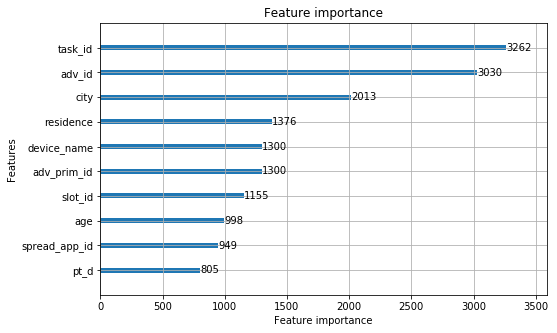

In [38]:
# lightgbm2 logloss
lgb.plot_importance(model_lightgbm2, max_num_features = 10, figsize = (8, 5))
plt.savefig("C://Users//lenovo//Downloads//Thesis//code1/model_visualization/importance.png", dpi = 200, bbox_inches = 'tight')
plt.show()

In [15]:
import graphviz

import os
os.environ[ "PATH" ] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

Plot 1st tree...


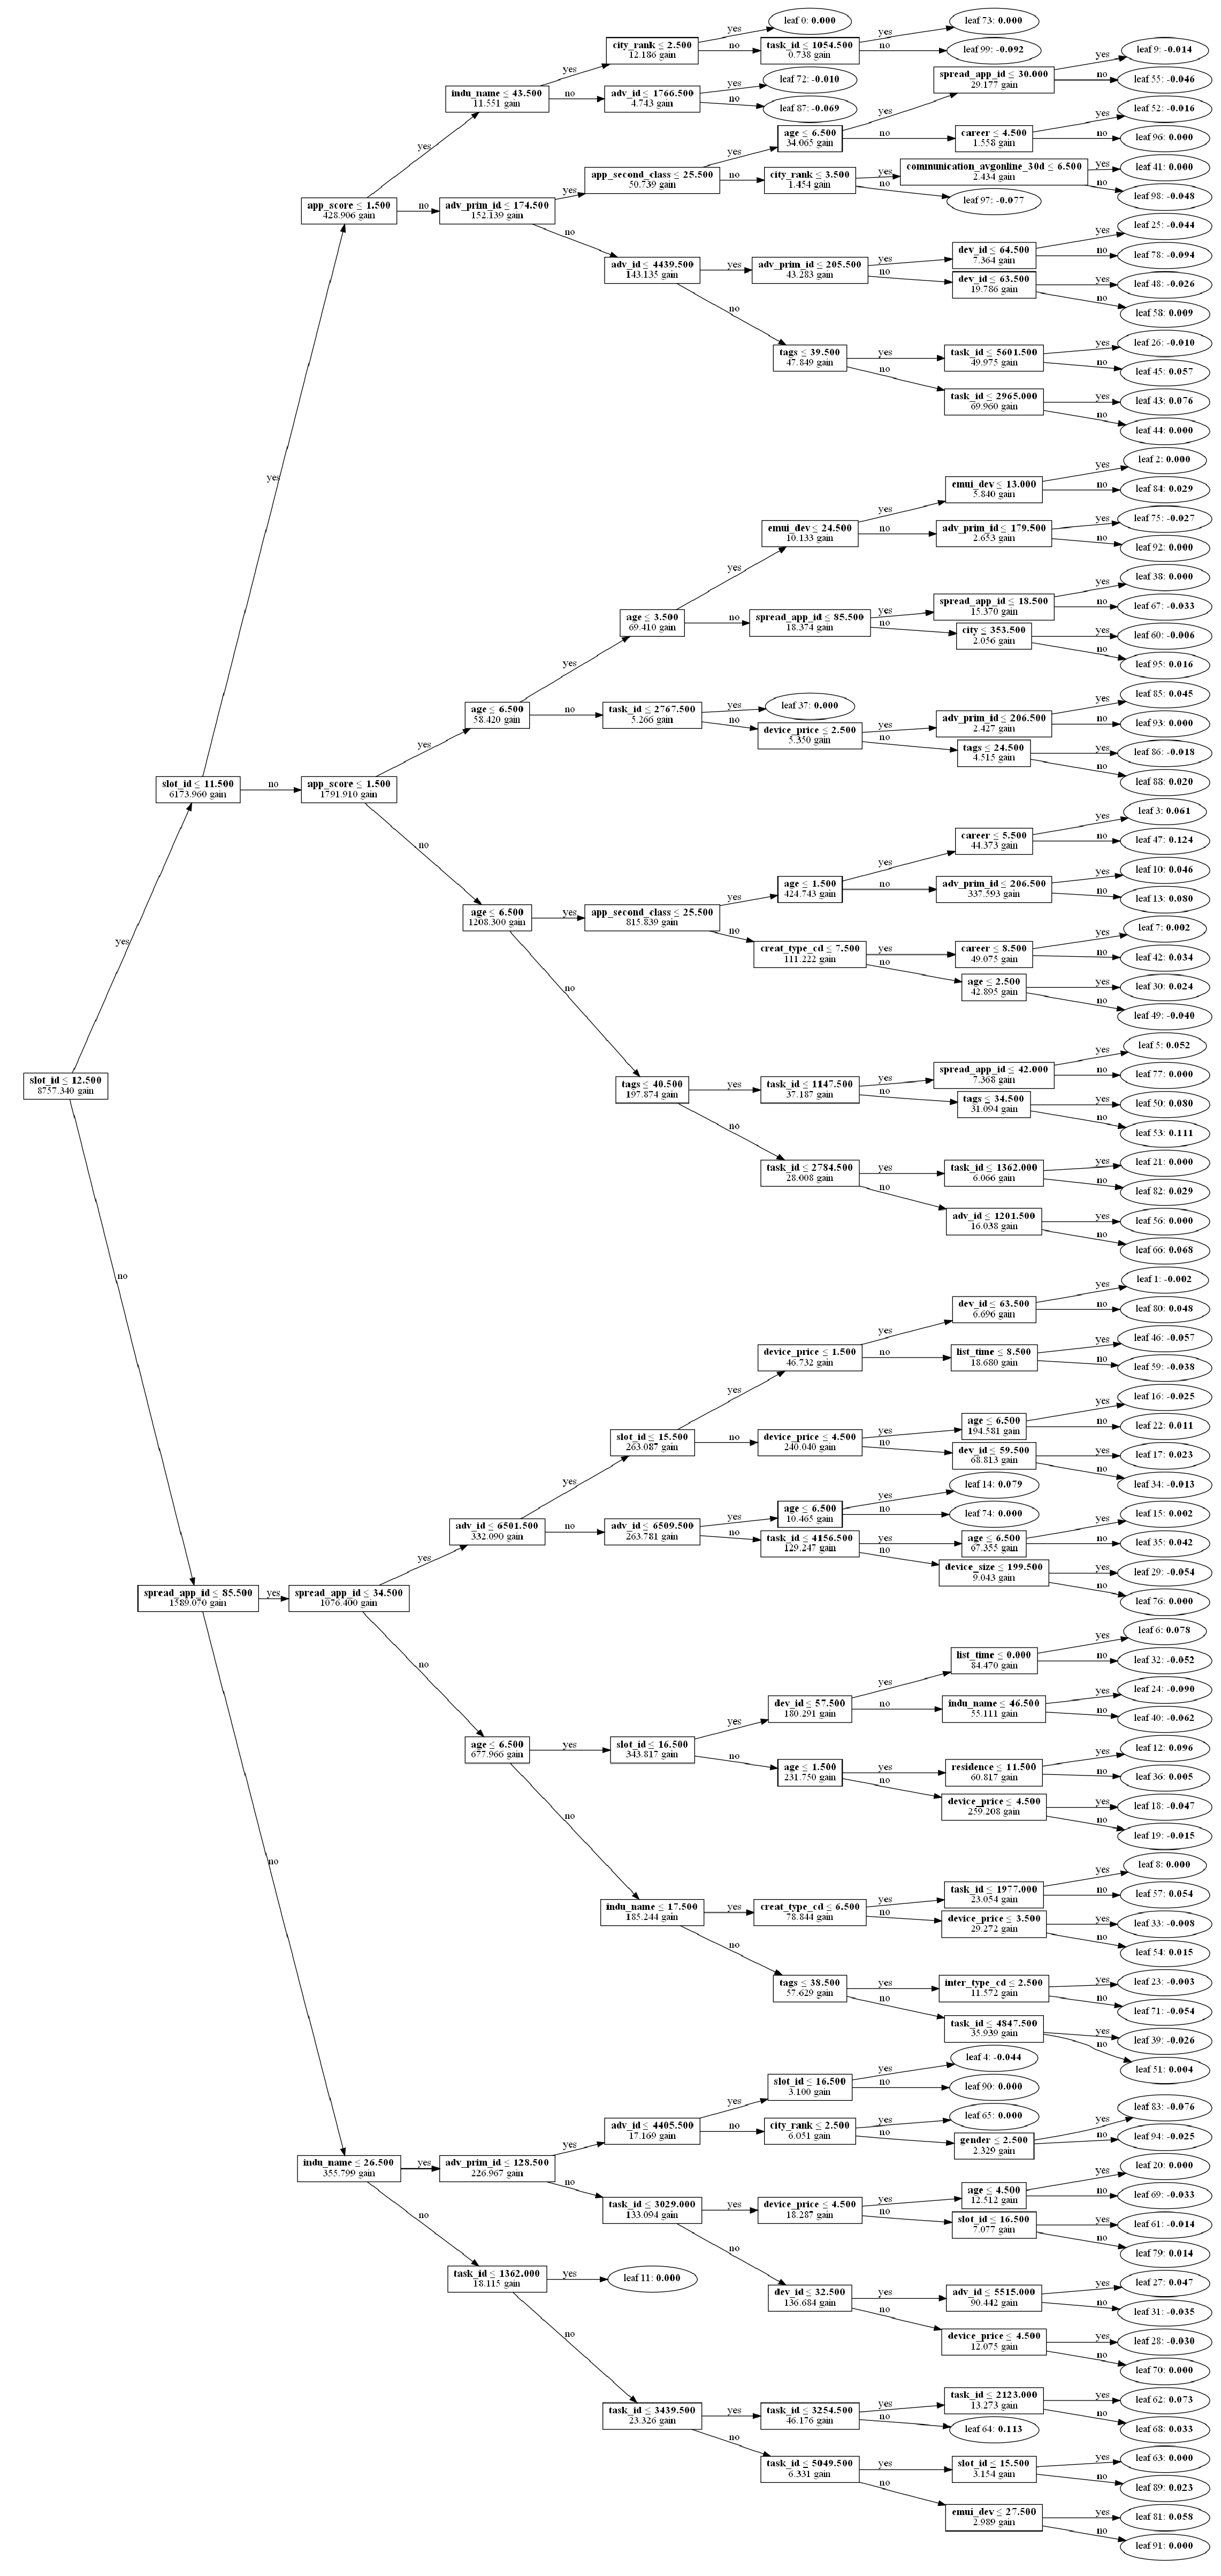

In [28]:
print('Plot 1st tree...')
ax = lgb.plot_tree(model_lightgbm2, tree_index = 1, figsize = (40, 200), show_info = ['split_gain'])
plt.savefig("C:\\Users\\lenovo\\Downloads\\Thesis\\code1\\tree.png", dpi = 200, bbox_inches = 'tight')
plt.show()

In [27]:
print('导出决策树的pdf图像到本地')
graph = lgb.create_tree_digraph(model_lightgbm2, tree_index = 1, name = 'Tree1')
graph.render(view = True)


导出决策树的pdf图像到本地


'Tree1.gv.pdf'